# Video Lesson - Returns

When we compute returns, it's important to get the total return, not the price return. The total return includes the dividends earned while holding the stock.

$$ R_{t,t+1} = \frac{P_{t+1}+D_{t,t+1}-P_{t}}{P_{t}} $$

To compute multi-period returns:

$$ R_{t,t+2}=(1+R_{t,t+1})(1+R_{t+1,t+2})-1$$

# Lab Session

# Returns

## From Prices to Returns

In this lab we'll work the very basics of Returns - computing returns, and compounding a sequence of returns.

Let's start with a set of prices for a stock "A", in a python list:

In [1]:
prices_a = [8.70, 8.91, 8.71]

Recall that the return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

If you come from R or another language that supports vectors, you might expect something like this to work:

```python
returns_a = prices_a[:-1]/prices_a[1:] - 1
```

However, since Python lists do not operate as vectors, that will not work, generating an error about "/" not working for lists.


In [2]:
# WILL NOT WORK - THIS WILL GENERATE AN ERROR!
# prices_a[1:]/prices_a[:-1] -1

Instead, we can convert them to a `numpy` array. Numpy arrays _do_ behave like vectors, so this works:

In [3]:
import numpy as np

prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [4]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

Now, let's add a few more days of prices and introduce a second stock. Let's call these two stocks "BLUE" and "ORANGE". Instead of using raw numpy arrays, we are going to use the far more powerful Pandas DataFrame, which wraps the functionality of numpy into a very convenient and easy to use data structure called a DataFrame. Note how the DtaFrame has two nicely indexed columns as well as a row index that by default runs from 0 to 4.

In [5]:
import pandas as pd

prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [6]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


**WARNING**

However, because Pandas DataFrames will align the row index (in this case: 0, 1, 2, 3, 4) the exact same code fragment will not work as you might expect.  (see the section on row alignment in the "Crash Course" videos if this is unclear to you)

In [7]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [8]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [9]:
prices.iloc[1:]/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


We can fix this in one of several ways. First, we can extract the values of the DataFrame column which returns a numpy array, so that the DataFrame does not try and align the rows.

In [10]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


You could have also used the values in the denominator:

In [11]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


However, there are a couple of ways to do this without extracting the values, and these are probably a bit cleaner and more readable. The first option is to use the `.shift()` method on the array, which realigns the indices.

In [12]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Since we want to get the row at index 0 (8.84 and 10.66) to line up with the row at index 1 (8.54 and 10.30) so we can divide the 2nd row (at index 1) by the first row (at index 0) we want to shift the rows in the denominator by 1 ... which we do with `.shift(1)`

In [13]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


So, now we can obtain the returns on each day as follows:

In [14]:
returns = prices/prices.shift(1) - 1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Note how we cannot compute returns for the first day, because we dont have the closing price for the previous day. In general, we lose one data point when we go from prices to returns.

Finally, there is a built-in method in DataFrame that computes the percent change from one row to another. Since that is exactly what a return is (the percent change in price) we can just use this method to compute the return.


In [15]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


## Reading data from a CSV file
Since typing in returns is tedious, let's read the data in from a file. Pandas provides a convenient and simple way to read in a CSV file of the returns.

In [16]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [17]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [18]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [19]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

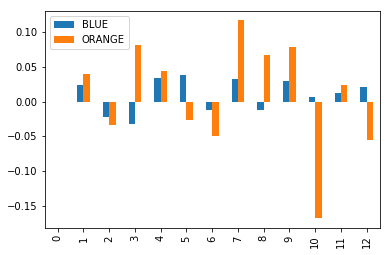

In [22]:
returns.plot.bar();

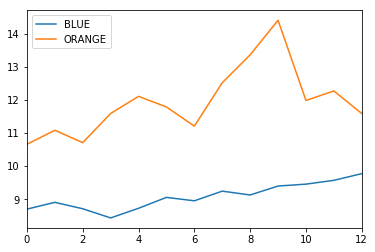

In [21]:
prices.plot();

## Compounding Returns

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

Let's compute the compounded return of our two series. 

In [23]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [24]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [25]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [26]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [27]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [28]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [29]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002